# BME 590 Data Science and Health
## Midterm Project

For the midterm project, you will be putting many of the skills that we have covered in the course so far to create a clinical risk prediction score. Please follow the instructions in this notebook carefully to make sure that you receive full credit for this assignment.

### Background

In 1987, a paper was published in the *Journal of Chronic Disease* titled *A New Method of Classifying Prognostic Comorbidity in Longitudinal Studies: Development and Validation*. This was one of the first papers that created a clinical risk score that could be easily computed and could predict clinical outcomes. To give you an idea of how popular this score is, it has been cited 27,497 times at the time that this assignment was created. As a note, comorbidity describes how many different diseases a patient has. 

In 1987, statistical methods were not as easy to apply as they are today. In addition, data were much harder to come by and to analyze. Due to the improvement of computing power and general statistical practice, it is now much easier to create clinical risk scores than in the past. This will your primary task in this assignment.

## Task 1: Background

Before you begin creating your own version of the Charlson Comorbidity Index, as it is known, it is important to familiarize yourself with the paper. A copy of it can be found [here](http://www.aqc.ch/download/HSM_Suppl_8_charlson.pdf). 

### Answer the following questions:

#### How many patients' data were used to create the model?

**<span style="color:blue; font-family:Times New Roman; font-size:16px;">Solution:</span>**   
**559** patients's data was used as "Training" population, and **685** women's data was used as "Testing" population. Thus we have total 1244 patients's data used. **559** patients data was used to create the model, **685** patients data was used for validation.
Note: The intended training population was 607, but 3 patients could not be located, and 45 patients was unavailable for follow-up, which resulted in 559 patients studied for training.   

#### What time frame were the data from?

**<span style="color:blue; font-family:Times New Roman; font-size:16px;">Solution:</span>**    
The training population consisted of all patients admitted to the medical service at New York Hospital during a **1-month period in 1984**, and complete **1-yr follow-up** information was studied.
The testing population was those who received their first treatment at Yale New Haven Hospital **between 1 January 1962 and 31 December 1969**,and complete follow-up information was obtained for all but one of the patients at 5 yr, and for all but four of those eligible for **10-yr follow up** at the closing date of the study.

#### How was the model validated?

**<span style="color:blue; font-family:Times New Roman; font-size:16px;">Solution:</span>**  
The model was developed empirically from 1-yr mortality from an inception cohort of patients admitted to the medical service for comorbid diseases. A weighted index that takes into account the number and the seriousness of comorbid disease was developed in a cohort of 559 medical patients.The **Comorbidity Index** was tested for its ability to predict risk of death from comorbid disease in the second cohort of 685 patients during a 10-yr follow-up.   
Specifically, 1-yr mortality rates were analyzed according to the weighted index of comorbid disease, illness severity and reason for admission, and without reason for admission for survived hospitalization. Predictors of mortality like age, illness severity, comorbidity were studied. In the longitudinal studies, age was added to the score from the comorbidity index. The weighted comorbidity index was then validated by ten-year actual and predicted survival according to age-comorbidity in the testing population.   
The data was also analyzed according to the method for staging comorbidity developed by **Kaplan and Feinstein**. They performed similarly with the new index.    
The study was validated both the weighted index and the Kaplan and Feinstein method of ranking comorbidity, but the comorbidity-age composite strategy has not been validated.


#### How many patients were used to validate the model results?

**<span style="color:blue; font-family:Times New Roman; font-size:16px;">Solution:</span>**  
The model was tested for its ability to predict risk of death from comorbid diseas in the second cohort of **685** patients during a 10-yr follow-up.

#### What were the characteristics of patients in the "Testing population"?

**<span style="color:blue; font-family:Times New Roman; font-size:16px;">Solution:</span>**    
The testing population consisted of all 685 women with histologically proven primary carcinoma of the breast, who received their first treatment at Yale New Haven Hospital between 1 Janary 1962 and 31 December 1969.   
1. In this cohort of breast cancer patients, the prevalence of comorbid disease was significantly **lower** than in the cohort of medical patients. For example, 86% of the 588 breast cancer patients had comorbidity index scores of zero.
2. The 1-yr survivals were greater in testing population (i.e. 99, 94, 84 and 69%) than in the training population.
3. By 10 yr, 83/685 breast cancer patients died of comorbid disease, 12, by the end of the 1st year, and additional 27 by the end of the 5th year, and an additional 44 by 10 yr.
4. None of the variables that predicted survival in the cohort as a whole – TNM stage, nodal status, clinical rate of growth or menstrual status – was a significant predictor of death from comorbid disease, except **age**.
5. Among all of the clinical and demographic variables, only two were significant predictors of risk of comorbid death – **age and comorbidity**.
6. The testing population **stratified** according to the weighted index of comorbidity, showed as the picture. With a higher index, there was a significant decrease in survival.
<img src="picture1.PNG" alt="drawing" width="500"/>

In the original paper, the conditions listed are not coded in any way. Follow-up papers by [Deyo in 1992](https://www.ncbi.nlm.nih.gov/pubmed/1607900) and [Quan in 2005](https://www.ncbi.nlm.nih.gov/pubmed/16224307), added the ICD-9-CM groupings for the conditions listed in the Charlson Comorbidity Index. In the provided database, a lookup between condition category and code has been provided.

## Task 2: Exploratory Data Analysis and SQL

For this project, the data is located [here](https://duke.box.com/s/vx627f0cypndusbl2k6jyqp9vo33d15g). Please download the database and put it in the same directory as this notebook (or in its own separate directory if you choose). **Make sure you add the database to the provided .gitignore file**. 

### DO NOT COMMIT THE DB FILE

##### Create a connection to the database and complete the following tasks/answer the questions using SQL queries. Remember that you can make a SQL query to the database with the following syntax:

`pd.read_sql(""" YOUR SQL QUERY """, conn)`

In [1]:
import sqlite3
conn = sqlite3.connect("./data/mimic_subset.db")

In [2]:
import pandas as pd

### General

#### List the tables

In [3]:
tables = pd.read_sql("SELECT * FROM sqlite_master where type='table'",conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,admission,admission,2,"CREATE TABLE ""admission"" (\n""index"" INTEGER,\n..."
1,table,diagnosis,diagnosis,1233,"CREATE TABLE ""diagnosis"" (\n""index"" INTEGER,\n..."
2,table,charlson_codes,charlson_codes,4982,"CREATE TABLE ""charlson_codes"" (\n""index"" INTEG..."
3,table,patient,patient,5087,"CREATE TABLE ""patient"" (\n""index"" INTEGER,\n ..."


#### For each table, select a small number of records (rows) and display the columns

In [4]:
from IPython.display import display
from colorama import Fore,Style

In [5]:
table_dict = {}
for table in tables.tbl_name:
    table_dict[table]=pd.read_sql("SELECT * FROM %s LIMIT 5" % table, conn)
    print('\033[1m' + "Table: %s" % table )
    display(table_dict[table])
    print("\n")

Table: admission


,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,...,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,0,2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,...,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,None,None,BRAIN MASS,0,1
1,1,13,34,34,144319,2191-02-23 05:23:00,2191-02-25 20:20:00,None,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2191-02-23 04:23:00,2191-02-23 07:25:00,BRADYCARDIA,0,1
2,2,17,38,36,165660,2134-05-10 11:30:00,2134-05-20 13:16:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,...,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,None,None,VENTRAL HERNIA/SDA,0,1
3,3,25,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,...,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,2199-10-20 09:34:00,2199-10-20 13:25:00,PNEUMONIA,0,1
4,4,26,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,...,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,2199-12-21 20:38:00,2199-12-22 00:01:00,ALTERED MENTAL STATUS,0,1




Table: diagnosis


,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,0,0,1297,109,172335,1.0,40301
1,1,1,1298,109,172335,2.0,486
2,2,2,1299,109,172335,3.0,58281
3,3,3,1300,109,172335,4.0,5855
4,4,4,1301,109,172335,5.0,4254




Table: charlson_codes


,index,code,category
0,0,410,MI
1,1,4100,MI
2,2,41000,MI
3,3,41001,MI
4,4,41002,MI




Table: patient


,index,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,0,234,249,F,2075-03-13 00:00:00,None,None,None,0
1,1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,None,1
2,2,236,251,M,2090-03-15 00:00:00,None,None,None,0
3,3,237,252,M,2078-03-06 00:00:00,None,None,None,0
4,4,238,253,F,2089-11-26 00:00:00,None,None,None,0


### Patients:

#### What is the breakdown of gender for patients?

In [6]:
pd.read_sql("SELECT DISTINCT gender FROM patient ",conn)

,GENDER
0,F
1,M


In [7]:
pd.read_sql("SELECT gender,COUNT(*) as gender_count FROM patient GROUP BY gender ORDER BY gender_count DESC ", conn)

,GENDER,gender_count
0,M,26121
1,F,20399


In [8]:
percent_M = 26121/(26121+20399)
print("F: %.2f, M: %.2f" %(1-percent_M, percent_M))

F: 0.44, M: 0.56


#### Of the patients in the patients table, how many of them have a death date listed? 

In [9]:
pd.read_sql("SELECT COUNT(*) FROM patient WHERE DOD IS NOT NULL", conn)

,COUNT(*)
0,15759


### Admissions:

#### How many unique patients are there in the admissions dataset?

In [10]:
table_dict['admission'].columns

Index(['index', 'Unnamed: 0', 'ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [11]:
pd.read_sql("SELECT COUNT(DISTINCT subject_id) AS unique_patients FROM admission",conn)

,unique_patients
0,17680


#### How many unique encounters are there in this dataset?

In [12]:
pd.read_sql("SELECT COUNT(DISTINCT hadm_id) AS unique_encounters FROM admission",conn)

,unique_encounters
0,21879


#### How many encounters have an ED time (either registration or out) listed?

In [13]:
pd.read_sql("SELECT COUNT(*) FROM admission WHERE edregtime IS NOT NULL OR edouttime IS NOT NULL ", conn)

,COUNT(*)
0,14495


#### List the primary diagnoses (Diagnosis field) in order of their prevalence

In [14]:
primary_diag = pd.read_sql("SELECT diagnosis,COUNT(*) as dia_count FROM admission GROUP BY diagnosis ORDER BY dia_count DESC", conn)
primary_diag.head()

,DIAGNOSIS,dia_count
0,PNEUMONIA,969
1,SEPSIS,501
2,ALTERED MENTAL STATUS,477
3,INTRACRANIAL HEMORRHAGE,441
4,CONGESTIVE HEART FAILURE,418


In [15]:
primary_diag.shape

(6752, 2)

#### Now list the count of diagnoses along with the diagnosis name only for patients who died in their hospital stay in descending order

In [16]:
diag_count = pd.read_sql("SELECT diagnosis,COUNT(*) as diag_count FROM admission WHERE hospital_expire_flag =1 GROUP BY diagnosis ORDER BY diag_count DESC", conn)
diag_count.head()

,DIAGNOSIS,diag_count
0,PNEUMONIA,150
1,INTRACRANIAL HEMORRHAGE,138
2,SEPSIS,100
3,ALTERED MENTAL STATUS,54
4,CONGESTIVE HEART FAILURE,49


In [17]:
diag_count.shape

(934, 2)

### Charlson Codes:

#### How many categories are there? 

In [18]:
pd.read_sql("SELECT * FROM charlson_codes",conn).head()

,index,code,category
0,0,410,MI
1,1,4100,MI
2,2,41000,MI
3,3,41001,MI
4,4,41002,MI


In [19]:
pd.read_sql("SELECT COUNT(DISTINCT category) AS distinct_catg FROM charlson_codes", conn)

,distinct_catg
0,17


In [20]:
pd.read_sql("SELECT category, COUNT(*) AS catg_count FROM charlson_codes GROUP BY category ORDER BY catg_count DESC LIMIT 5", conn)

,category,catg_count
0,Cancer,6449
1,Pulmonary,1498
2,Stroke,1000
3,Renal,552
4,Mets,444


There are total **17** categories.

### Diagnoses

#### What is the minimum, average, and maximum count of codes that is given to a patient at a particular encounter?

In [21]:
pd.read_sql("SELECT COUNT(DISTINCT hadm_id) FROM diagnosis",conn)

,COUNT(DISTINCT hadm_id)
0,21879


In [22]:
pd.read_sql("SELECT * FROM diagnosis",conn).shape

(320154, 7)

In [23]:
pd.read_sql("SELECT subject_id, hadm_id, COUNT(icd9_code) AS count_code FROM diagnosis GROUP BY subject_id, hadm_id ",conn).head()

,SUBJECT_ID,HADM_ID,count_code
0,23,124321,10
1,34,144319,8
2,36,165660,12
3,85,112077,19
4,107,174162,17


In [24]:
pd.read_sql("SELECT MAX(y.count_code) AS max_count_code,MIN(y.count_code) AS min_count_code,AVG(y.count_code) AS avg_count_code FROM (SELECT subject_id, hadm_id, COUNT(icd9_code) AS count_code FROM diagnosis GROUP BY subject_id, hadm_id) y",conn).head()


,max_count_code,min_count_code,avg_count_code
0,39,1,14.632936


### Combined information

#### There is a `DEATHTIME` column in the admission table. In addition, there is death information present in the patient table. Is the information in the admission table complete? (Are there patients who have death information in the patient table who do not have the same information in the admissions table?)

In [25]:
# Check if patient is deaded but without death time in admission table
pd.read_sql("SELECT COUNT(*) FROM admission WHERE deathtime IS NULL AND hospital_expire_flag = 1", conn)

,COUNT(*)
0,0


In [26]:
pd.read_sql("SELECT dod FROM patient", conn).shape

(46520, 1)

In [27]:
pd.read_sql("SELECT deathtime FROM admission", conn).shape

(21879, 1)

In [28]:
pd.read_sql("SELECT COUNT(*) FROM admission WHERE deathtime IS NOT NULL",conn)

,COUNT(*)
0,2286


In [29]:
pd.read_sql("SELECT COUNT(*) FROM patient WHERE dod IS NOT NULL",conn)

,COUNT(*)
0,15759


In [30]:
miss_matched=pd.read_sql("SELECT admission.subject_id,admission.deathtime,patient.dod FROM admission, patient \
            WHERE admission.subject_id = patient.subject_id AND admission.deathtime NOT LIKE patient.dod GROUP BY patient.subject_id",conn)
#select table1.* from table1,table2
#where table1.id =table2.id and table1.place not like table2.place
miss_matched.shape

(2231, 3)

In [31]:
miss_matched.head()

,SUBJECT_ID,DEATHTIME,DOD
0,109,2142-08-30 15:20:00,2142-08-30 00:00:00
1,111,2144-07-01 14:55:00,2144-07-01 00:00:00
2,124,2166-02-01 06:55:00,2166-02-01 00:00:00
3,188,2162-01-17 05:50:00,2162-01-17 00:00:00
4,305,2129-09-07 17:55:00,2129-09-07 00:00:00


**<span style="color:blue; font-family:Times New Roman; font-size:16px;">Summary:</span>**  
The information is not completed in admssion table, as **2231** patients do not have the same death information in the patients table.These information missed specific death clock time in patient death table, they are all 00:00:00.   
Meanwhile, we could also see that we have **15759** patients have death information in patient table, while there are only **2285** collected death information in admission table. Some of the patient might be dead in other places, and have no admission information.

#### Join the diagnosis and the Charlson tables together by code and list the Charlson Categories and their counts in descending order

In [32]:
pd.read_sql("SELECT * FROM charlson_codes",conn).shape

(12617, 3)

In [33]:
pd.read_sql("SELECT * FROM diagnosis",conn).shape

(320154, 7)

In [34]:
diag_char_joined= pd.read_sql("SELECT diagnosis.*, charlson_codes.code,charlson_codes.category FROM diagnosis left join charlson_codes on\
            diagnosis.icd9_code = charlson_codes.code ",conn)

In [35]:
diag_char_joined.head()

,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,code,category
0,0,0,1297,109,172335,1.0,40301,40301,Renal
1,1,1,1298,109,172335,2.0,486,None,None
2,2,2,1299,109,172335,3.0,58281,58281,Renal
3,3,3,1300,109,172335,4.0,5855,5855,Renal
4,4,4,1301,109,172335,5.0,4254,4254,CHF


In [36]:
pd.read_sql("SELECT code,category,COUNT(*) AS catg_count FROM diagnosis left join charlson_codes on\
            diagnosis.icd9_code = charlson_codes.code GROUP BY category ORDER BY catg_count DESC LIMIT 5",conn)

,code,category,catg_count
0,None,None,264476
1,4254,CHF,11347
2,49121,Pulmonary,6402
3,40301,Renal,6209
4,25000,DM,5295


In [37]:
# get rid of null information and join the table, show first 5 rows
diag_chalson = pd.read_sql("SELECT code,category,COUNT(*) AS catg_count FROM diagnosis left join charlson_codes on\
            diagnosis.icd9_code = charlson_codes.code WHERE code IS NOT NULL GROUP BY category ORDER BY catg_count DESC",conn)
diag_chalson.head()

,code,category,catg_count
0,39891,CHF,11347
1,4168,Pulmonary,6402
2,40301,Renal,6209
3,25000,DM,5295
4,36234,Stroke,4041


## Task 3: Visualization

For this task, you can use pandas along with any plotting library that we've learned about to create the following visualizations. You may have to create a separate dataframe specifically for each of these plots.

> One important concept in hospital care is the Length of Stay for a patient. In general, the longer a patient stays, the more severe their case. There are many initiatives to try and reduce the length of stay. 

#### Create a length of stay (in days) column in the dataframe. The Length of Stay is defined as the discharge time minus the admission time. 

For this, you will need to use the `.dt.days` accessor as seen [here](https://stackoverflow.com/a/45039811)

In [38]:
df_ad = pd.read_sql("SELECT * FROM admission",conn)
df_ad.columns

Index(['index', 'Unnamed: 0', 'ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [39]:
df_ad['DISCHTIME'] = pd.to_datetime(df_ad['DISCHTIME'])
df_ad['ADMITTIME'] = pd.to_datetime(df_ad['ADMITTIME'])

df_ad['len_stay'] = (df_ad['DISCHTIME'] - df_ad['ADMITTIME']).dt.days
df_ad['len_stay'].head()

0     6
1     2
2    10
3     3
4    27
Name: len_stay, dtype: int64

#### Create a plot which contains boxplots that contain the length of stay information, broken down by Admission Type

In [40]:
import matplotlib.pyplot as plt
import numpy as np

In [41]:
df_ad['ADMISSION_TYPE'].value_counts()

EMERGENCY    18642
ELECTIVE      2992
URGENT         245
Name: ADMISSION_TYPE, dtype: int64

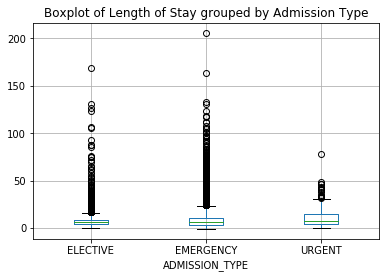

In [42]:
df_ad.boxplot(column=['len_stay'], by='ADMISSION_TYPE')
plt.suptitle("")
plt.title('Boxplot of Length of Stay grouped by Admission Type')
plt.show()

#### Create a scatter plot which has the length of stay in days on one axis and the number of diagnosis codes for a particular encounter on the other

In [43]:
pd.read_sql("SELECT * FROM diagnosis",conn).shape

(320154, 7)

In [44]:
pd.read_sql("SELECT DISTINCT subject_id FROM admission",conn).shape

(17680, 1)

In [45]:
pd.read_sql("SELECT DISTINCT hadm_id FROM admission",conn).shape

(21879, 1)

In [46]:
df_ad_code = pd.read_sql("SELECT admission.hadm_id, COUNT(icd9_code) AS Count_code FROM admission LEFT JOIN diagnosis on\
            admission.hadm_id = diagnosis.hadm_id GROUP BY admission.hadm_id ",conn)
df_ad_code.shape

(21879, 2)

In [47]:
df_ad.shape

(21879, 22)

In [48]:
df_adm = pd.merge(df_ad[['HADM_ID','len_stay','HOSPITAL_EXPIRE_FLAG']],df_ad_code[['HADM_ID','Count_code']],on='HADM_ID')
df_adm.head()

,HADM_ID,len_stay,HOSPITAL_EXPIRE_FLAG,Count_code
0,124321,6,0,10
1,144319,2,0,8
2,165660,10,0,12
3,101651,3,0,17
4,117876,27,0,22


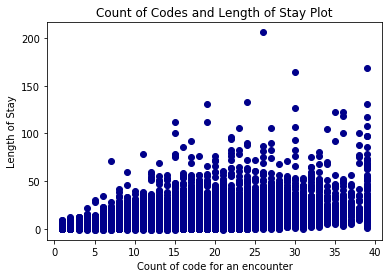

In [49]:
ax = plt.subplot()
plt.scatter(df_adm['Count_code'], df_adm['len_stay'],c='darkblue')    
box = ax.get_position()
plt.xlabel('Count of code for an encounter')
plt.ylabel('Length of Stay')
plt.title('Count of Codes and Length of Stay Plot')
plt.show()

#### Ask your own question about the data and answer it with a visualization of your choice

**<span style="color:blue; font-family:Times New Roman; font-size:16px;">Question:</span>**  
What is the relationship between the length of stay (in days) versus the number of diagnosis codes that are associated with a particular encounter?

In [50]:
import seaborn as sns

In [51]:
df_adm['Count_code'].shape

(21879,)

In [52]:
code_mean = np.mean(df_adm['Count_code'])
code_mean

14.63293569175922

In [53]:
stay_mean = np.mean(df_adm['len_stay'])
stay_mean

8.631290278349102

In [54]:
# len_stay which is less than 25
df_adm['len_stay'][df_adm['len_stay']<20].count()/df_adm['len_stay'].shape[0]

0.9116961469902647

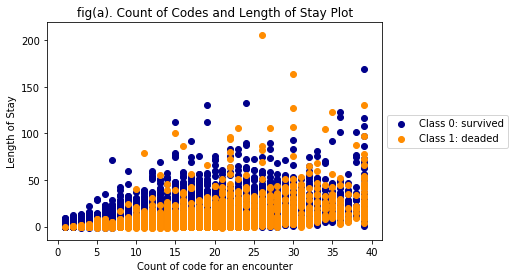

In [55]:
ax = plt.subplot()
plt.scatter(df_adm[df_adm['HOSPITAL_EXPIRE_FLAG']==0]['Count_code'], df_adm[df_adm['HOSPITAL_EXPIRE_FLAG']==0]['len_stay'],label= 'Class 0: survived',c='darkblue')  
plt.scatter(df_adm[df_adm['HOSPITAL_EXPIRE_FLAG']==1]['Count_code'], df_adm[df_adm['HOSPITAL_EXPIRE_FLAG']==1]['len_stay'],label= 'Class 1: deaded',c='darkorange')  
box = ax.get_position()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Count of code for an encounter')
plt.ylabel('Length of Stay')
plt.title('fig(a). Count of Codes and Length of Stay Plot')
plt.show()

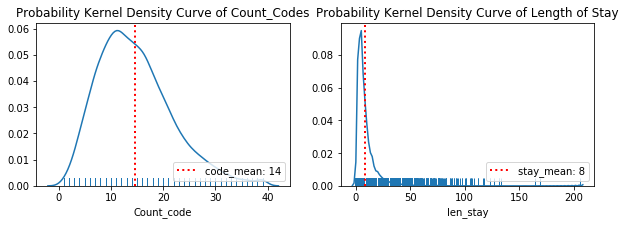

In [56]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(10,3))
ax = axs[0]
sns.distplot(df_adm['Count_code'],rug=True,hist=False,ax=axs[0])
ax.axvline(code_mean, linestyle=':',c = 'r', linewidth=2,label = 'code_mean: %d' % code_mean)
ax.legend(loc = 4)
#plt.text(.58, 1.2, 'Theoretical: 0.5', dict(size=10))
ax.set_title ('Probability Kernel Density Curve of Count_Codes')

ax = axs[1]
sns.distplot(df_adm['len_stay'],rug=True,hist=False,ax=axs[1])
ax.axvline(stay_mean, linestyle=':',c = 'r', linewidth=2,label = 'stay_mean: %d' % stay_mean)
ax.legend(loc = 4)
ax.set_title ('Probability Kernel Density Curve of Length of Stay')

plt.show()

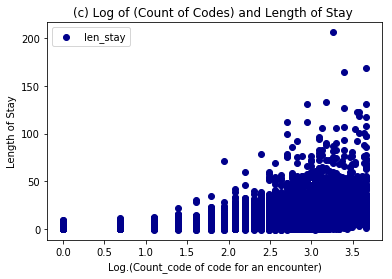

In [57]:
plt.scatter(np.log(df_adm['Count_code']), df_adm['len_stay'],c='darkblue')    
plt.legend(loc='upper left')
plt.xlabel('Log.(Count_code of code for an encounter)')
plt.ylabel('Length of Stay')
plt.title('(c) Log of (Count of Codes) and Length of Stay ')
plt.show()

**<span style="color:blue; font-family:Times New Roman; font-size:16px;">Answer:</span>**   
We could see from the above graphs and analysis that around 91 % of patient stay less than 20 days in hospitals. The mean of code for a particular encounter is around 14, and the mean of length of stay (in days) is around 8.   
From the scatter plot we could see that the higher number of codes is more likely to end up with longer stay days, especially between the middle range, the trend is more obvious. However, from **fig(a)** we cannot see distinguished relationship of length of stay and count of codes with patients' death, but dead patients has wider outier of stays than survived patients.   
In order to analyze their relation, I plotted scatter plots with log. In **fig(c)**, we could observe that with the increase of log.code, the length of days increase, and it dramatically increases to high level after log.code >2.5 for patients whose length of stays bigger than 50.   

The reason for this relationship could be explained by that when an encounter have higher counts of diagnosis codes,it means the patient have several **comorbidities** and it is highly risk that he or she is relatively more serious ill which results in longer stay in hospital.   

One way to optimize the analysis is to give a certain **adjusted risk** to the code, like the paper did, so we could get a better and meaningful relationship between the length of stay (in days) versus the number of diagnosis codes that are associated with a particular encounter.

## Task 4: Create the Design/Model matrix 

For this task, you will create the Design/Model matrix for your clinical risk score. Each row should pertain to a unique encounter, and the columns should be each of the categories available in the `charlson_codes` table. 

In particular, you will need to detect the presence of an ICD-code that belongs to a category in the Charlson Comorbidity Index, and make the corresponding entry a 1 if it is present, and a 0 if it is not. 

In addition, you should create a column that contains the value 1.0 repeated to represent the intercept weight. 

Finally, you will need 1 column that represents whether a patient's death date is within 1 year of their encounter `ADMITTIME`.

Below are a list of steps that can walk you through the process. You do not need to necessarily follow these steps, but at the end you should end up with a matrix that looks something like this (with all of the category columns)


##### As a DataFrame

In [58]:
example_df = pd.DataFrame({'Intercept': [1,1,1], 'CHF': [1, 0, 0], 'MI': [1, 1, 0], 'Stroke': [0, 0, 0], '1_yr_mortality': [1, 0, 0]})
example_df

,Intercept,CHF,MI,Stroke,1_yr_mortality
0,1,1,1,0,1
1,1,0,1,0,0
2,1,0,0,0,0


##### As a Numpy array

In [59]:
example_df.values

array([[1, 1, 1, 0, 1],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]], dtype=int64)

### Recommended Steps for Creating the Design Matrix

For this task, you will need to use the `admission`, `diagnosis`, `charlson_codes`, and `patient` tables. 

To get an accurate death date at the encounter level, join the patient table into the admission table by patient identifier. From there, create a new column that determines whether there has been 1 year or less between the mortality(death) date and the admission time. 

Remember that when working with datetime columns, you will need to utilize the `pd.to_datetime` function. You can subtract times and use the `.dt.days` method to extract the number of days. [Reference](https://stackoverflow.com/a/45039811)

In [60]:
pd.read_sql("SELECT * FROM patient",conn).head()

,index,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,0,234,249,F,2075-03-13 00:00:00,None,None,None,0
1,1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,None,1
2,2,236,251,M,2090-03-15 00:00:00,None,None,None,0
3,3,237,252,M,2078-03-06 00:00:00,None,None,None,0
4,4,238,253,F,2089-11-26 00:00:00,None,None,None,0


In [61]:
pd.read_sql("SELECT * FROM admission",conn).columns

Index(['index', 'Unnamed: 0', 'ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [62]:
# join admission and patient table, get missing deathtime for admission.deathtime from DOD
df_ad_pat = pd.read_sql("SELECT admission.subject_id,hadm_id,admittime,deathtime,diagnosis,gender,dob,dod FROM admission \
            LEFT JOIN patient on admission.subject_id=patient.subject_id",conn)
df_ad_pat.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DEATHTIME,DIAGNOSIS,GENDER,DOB,DOD
0,23,124321,2157-10-18 19:34:00,None,BRAIN MASS,M,2082-07-17 00:00:00,None
1,34,144319,2191-02-23 05:23:00,None,BRADYCARDIA,M,1886-07-18 00:00:00,2192-01-30 00:00:00
2,36,165660,2134-05-10 11:30:00,None,VENTRAL HERNIA/SDA,M,2061-08-17 00:00:00,None
3,357,101651,2199-10-20 12:05:00,None,PNEUMONIA,M,2135-03-22 00:00:00,2201-08-02 00:00:00
4,357,117876,2199-12-21 22:37:00,None,ALTERED MENTAL STATUS,M,2135-03-22 00:00:00,2201-08-02 00:00:00


In [63]:
df_ad_pat['DOD'].isnull().value_counts()

True     14558
False     7321
Name: DOD, dtype: int64

In [64]:
df_ad_pat['DEATHTIME'].isnull().value_counts()

True     19593
False     2286
Name: DEATHTIME, dtype: int64

In [65]:
# update ad.deattime from dod, if ad.deathtime is null 
df_ad_pat = df_ad_pat.reset_index(drop=True) # very important, otherwise the output dataframe is just a view
df_ad_pat.loc[df_ad_pat['DEATHTIME'].isnull(),'DEATHTIME'] = df_ad_pat['DOD']
df_ad_pat['DEATHTIME'].notnull().value_counts()

False    14558
True      7321
Name: DEATHTIME, dtype: int64

In [66]:
# Not sure why the dataframe revert to orignial one, so I have to keep modified file to local, and read_csv
df_ad_pat.to_csv("output0.csv",index = None, header=True) 
df_output0 = pd.read_csv('output0.csv')

In [67]:
df_output0['DEATHTIME'] = pd.to_datetime(df_output0['DEATHTIME'])
df_output0['ADMITTIME'] = pd.to_datetime(df_output0['ADMITTIME'])

In [68]:
df_output0['1_yr_mortality'] = np.where((df_output0['DEATHTIME'] - df_output0['ADMITTIME']).dt.days<=365,1,0)
df_output0['1_yr_mortality'].value_counts()

0    16047
1     5832
Name: 1_yr_mortality, dtype: int64

In [69]:
df_output0.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DEATHTIME,DIAGNOSIS,GENDER,DOB,DOD,1_yr_mortality
0,23,124321,2157-10-18 19:34:00,NaT,BRAIN MASS,M,2082-07-17 00:00:00,NaN,0
1,34,144319,2191-02-23 05:23:00,2192-01-30,BRADYCARDIA,M,1886-07-18 00:00:00,2192-01-30 00:00:00,1
2,36,165660,2134-05-10 11:30:00,NaT,VENTRAL HERNIA/SDA,M,2061-08-17 00:00:00,NaN,0
3,357,101651,2199-10-20 12:05:00,2201-08-02,PNEUMONIA,M,2135-03-22 00:00:00,2201-08-02 00:00:00,0
4,357,117876,2199-12-21 22:37:00,2201-08-02,ALTERED MENTAL STATUS,M,2135-03-22 00:00:00,2201-08-02 00:00:00,0


Next, join the `diagnosis` and `charlson_codes` data together. If there is missing information, use the type of join that removes missing information. Not all diagnosis codes map to an existing Charlson category. 

In [70]:
pd.read_sql("SELECT DISTINCT category FROM charlson_codes", conn)

,category
0,MI
1,CHF
2,PVD
3,Stroke
4,Dementia
5,Pulmonary
6,Rheumatic
7,PUD
8,LiverMild
9,DM


In [71]:
diag_charlson_df = pd.read_sql("SELECT diagnosis.hadm_id,charlson_codes.code,charlson_codes.category FROM diagnosis left join charlson_codes on\
            diagnosis.icd9_code = charlson_codes.code WHERE charlson_codes.code IS NOT NULL",conn)

In [72]:
diag_charlson_df.shape

(55874, 3)

In [73]:
diag_charlson_df['HADM_ID'].value_counts().shape

(18027,)

In [74]:
df_output0.shape

(21879, 9)

Once you have this new DataFrame, you will notice that it is in a long format. You will need to turn it into a wide format so that each category is represented as its own column. You can start with this command to get started:

In [75]:
diag_charlson_df = diag_charlson_df.groupby(['HADM_ID','category']).size().unstack()

In [76]:
diag_charlson_df.head()

category,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke
HADM_ID,,,,,,,,,,,,,,,,,
100001,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
100009,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
100010,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100018,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0


`.groupby(['id', 'category']).size().unstack()`

You will also need to binarize (turn to 1s and 0s) each of the category columns. 

In [77]:
# Binarize the table
diag_charlson_df = diag_charlson_df.notnull().astype(int)

In [78]:
diag_charlson_df.shape

(18027, 17)

In [79]:
diag_charlson_df.head()

category,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke
HADM_ID,,,,,,,,,,,,,,,,,
100001,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
100003,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
100009,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
100010,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
100018,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1


Merge all of the data together so that it looks like the example above.

In [80]:
df_merged = pd.merge(df_output0[['HADM_ID','1_yr_mortality']],diag_charlson_df,on='HADM_ID')

In [81]:
df_merged.head()

,HADM_ID,1_yr_mortality,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke
0,144319,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,165660,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,101651,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,117876,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,112077,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [82]:
# add intercept to last column
df_merged['intercept'] = [1 for i in range(df_merged.shape[0])]

In [83]:
df_merged.head()

,HADM_ID,1_yr_mortality,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke,intercept
0,144319,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,165660,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,101651,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,117876,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
4,112077,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [84]:
# adjust columns positions
cols = df_merged.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[2:-1] +cols[1:2]
len(cols)

20

In [85]:
df_merged = df_merged[cols]

In [86]:
df_merged.head()

,HADM_ID,intercept,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke,1_yr_mortality
0,144319,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,165660,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,101651,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,117876,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,112077,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [87]:
df_merged.shape

(18027, 20)

In [88]:
df_merged_sorted = df_merged.sort_values(by=['HADM_ID'])
df_merged_sorted = df_merged_sorted.reset_index(drop=True)
df_merged_sorted.head()

,HADM_ID,intercept,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke,1_yr_mortality
0,100001,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,100003,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1
2,100009,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,100010,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,100018,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0


In [89]:
# Design Matrix, skip HAMD_ID column
df_merged_sorted.loc[:,'intercept':'Stroke'].head()

,intercept,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke
0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1


# Task 5: Fit a logistic regression model via gradient descent

Implement the gradient ascent algorithm and use it to iteratively update some initialized weights for your logistic regression. For this step, do not use an implementation in another library (sklearn, statsmodels). You must write your own implementation using base python, numpy, and other standard libraries. If you have a question about what is allowed, please ask one of the instructors.

Recall that the average loss can be expressed as follows (this is usually displayed with a negative sign out front)

$$\frac{1}{m}\sum_{i=1}^{m}y^{(i)} \log \sigma(\textbf{w}^T\textbf{x}^{(i)}) + (1-y^{(i)}) \log (1- \sigma(\textbf{w}^T\textbf{x}^{(i)}) $$

The Gradient Ascent update equation is given by: 
$$ w_j \leftarrow w_j + \alpha(y-\sigma(\textbf{w}^T\textbf{x}))x_j $$

where $\alpha$ is a learning rate which affects the speed of convergence. 

The pseudocode to fit a logistic regression model looks similar to the following:
```    
Repeat {

  1. Calculate average gradient value over the dataset(for all x_j)
  2. Multiply by the average gradient by the learning rate
  3. Update the weights by adding this value to the original weights

}
```

It is recommended that you have helper functions to perform the logistic function and the calculation of the gradient

In practice, you will want to initialize an array of weights w of the appropriate size with all 0s or some other small random value. Then, you will follow the pseudocode above, and update the weights iteratively. At each step, you will want to compute the value $y - \sigma(\textbf{w}^T\textbf{x})x_j$ over all of the rows of the matrix and find the average value over the entire dataset. Then apply the learning rate and update the weights according to the update equation above.

You will want to repeat this procedure until the algorithm converges. You can play around with the learning rate and the number of total iterations for this program to converge either faster or slower. In addition, you can choose to use other versions of gradient descent, such as mini-batch gradient descent and/or stochastic gradient descent to improve the convergence rate. One way to check for convergence is to check to make sure that the weights are not changing by a certain small threshold. Another way is to run for a number of iterations and check against the `statsmodels` implementation:

In [90]:
import copy 

In [91]:
def sigmoid(X, beta):
    """
    return sigmoid function
    """
    return 1.0/(1+np.exp(-np.dot(X, beta.T)))

In [92]:
def gradient(X, y,beta):
    """
    return gradient
    """
    return np.dot((y - sigmoid(X,beta)).T, X)

In [93]:
X = np.array(df_merged_sorted.loc[:,'intercept':'Stroke'])
X[:5,:]

array([[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1]],
      dtype=int64)

In [94]:
y = np.array(df_merged_sorted.loc[:,'1_yr_mortality'])
y[:5]

array([0, 1, 0, 0, 0])

In [95]:
lr = 2 # learning rate
beta =  np.zeros((X.shape[1])) # initialize to zeros
iter_num = 0
m = X.shape[0]
beta_norm = 1
# iteration until beta_norm is less than 0.0001
while beta_norm>0.0001:
    grad = gradient(X, y, beta)/m
    prev_beta = copy.deepcopy(beta)
    beta += lr * grad
    beta_norm = np.linalg.norm(beta - prev_beta)
    iter_num +=1

In [96]:
beta,iter_num

(array([-1.79563961,  0.64465494,  0.99347421, -0.07473563, -0.27733003,
         1.02888291, -0.04589031,  0.37518212,  0.88166956,  0.00944353,
         1.78434079, -0.04000001,  0.10232431,  0.36103045,  0.12770126,
         0.59368778,  0.15201159,  0.47557735]), 447)

```
from statsmodels import api as sm

logit = sm.Logit(y, X)
logit.fit().params
```

In [97]:
from statsmodels import api as sm

In [98]:
logit = sm.Logit(y, X)
logit.fit().params

Optimization terminated successfully.
         Current function value: 0.552290
         Iterations 5


array([-1.79681149,  0.64501572,  0.99381556, -0.07446433, -0.27682168,
        1.03639994, -0.03785321,  0.37496309,  0.88318575,  0.00971758,
        1.78530929, -0.0387222 ,  0.1027442 ,  0.36273724,  0.12806205,
        0.59364506,  0.15301175,  0.47533345])